In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error

In [2]:
n = 100
a = 0
b = 10
h = 0.1

def f(x):
    return np.cos(x/3)*np.sin(x/2)

g = np.array([s+i*h for i in range(n+1)])
xi_eqt = np.array([g[i]+(g[i+1]-g[i])/4 for i in range(len(g)-1)])
xi_eq = np.sort(np.append(np.append(xi_eqt, s), e))
xi_cht = np.array([1/2*(a+b)-1/2*(a-b)*np.cos((2*i-1)/(2*n)*np.pi) for i in range(n)])
xi_ch = np.sort(np.append(np.append(xi_cht, s), e))
xk = np.sort(np.concatenate((xi_eq, xi_ch)))
yi_eq = np.array([f(xj) for xj in xi_eq])
yi_ch = np.array([f(xj) for xj in xi_ch])

NameError: name 's' is not defined

In [ ]:
def Ln(x, xi, yi):
    Ln = 0
    for xj, yj in zip(xi, yi):
        l = 1
        for xk in xi[xi != xj]:
            l *= (x - xk) / (xj - xk)
        Ln += yj * l
    return Ln

In [247]:
Lni = np.array([Ln(xj, xi_eq, yi_eq) for xj in xi_eq])
mean_squared_error(yi_eq, Lni)

0.0

In [248]:
Lni = np.array([Ln(xj, xi_ch, yi_ch) for xj in xi_ch])
mean_squared_error(yi_ch, Lni)

0.017379884316414015

In [245]:
# ln = lagrange(xi_ch, f(xi_ch))
# lni_ch = np.array([ln(xj) for xj in xi_ch])
# mean_squared_error(yi_ch, lni_ch)

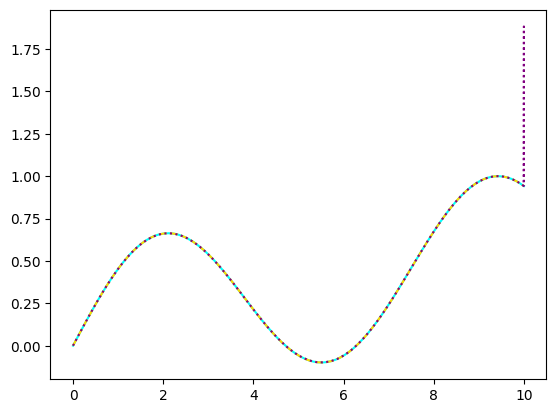

In [246]:
fig, ax = plt.subplots()
ax.plot(xk, f(xk), color='cyan')
ax.plot(xi_eq, Ln(xi_eq, xi_eq, yi_eq), color='gold', linestyle='--')
ax.plot(xi_ch, Ln(xi_ch, xi_ch, yi_ch), color='purple', linestyle=':')
# ax.plot(xi, poly, color='purple', linestyle=':')
# ax.set(xlim=(-10, 10), ylim=(-3, 3),)
plt.show()